In [1]:
# Installer les dependences necissaires pour le traitment :

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.2-cp314-cp314-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.3-cp314-cp314-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp314-cp314-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.4 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:020m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [ ]:
# Importer les biblio utilise dans le script :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Charger le dataset :

In [5]:
df = pd.read_csv("./data/Titanic-Dataset.csv")

In [ ]:
# Afficher une snippet depuis le dataset :

In [ ]:
df.head()

In [ ]:
# Voir les colonne du dataset, et leurs types :

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Affichier tous les statistiques du dataset, pour le mieux comprendre :

In [8]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Analyser les valeurs null dans le dataset :

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Checker pour les valeur non unique :

In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
# Visualiser le nombre des personnes qui vivent :

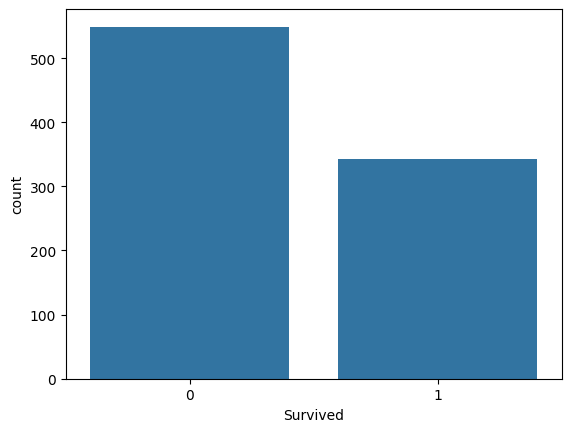

In [16]:
sns.countplot(data=df, x="Survived")
plt.show()

In [ ]:
# Visualiser la distribution par age :

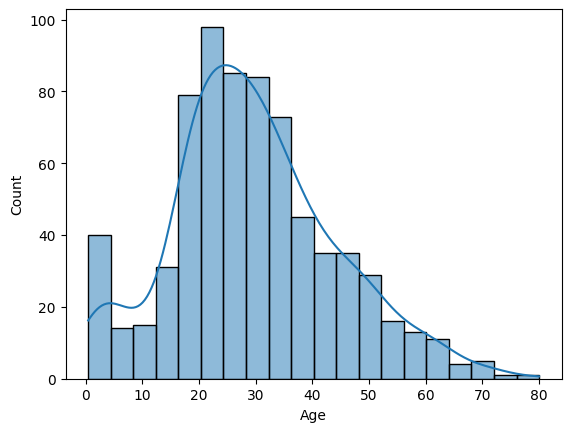

In [17]:
sns.histplot(df["Age"], kde=True)
plt.show()

In [20]:
# Visualiser la distribution des ages (majorites, outliers) :

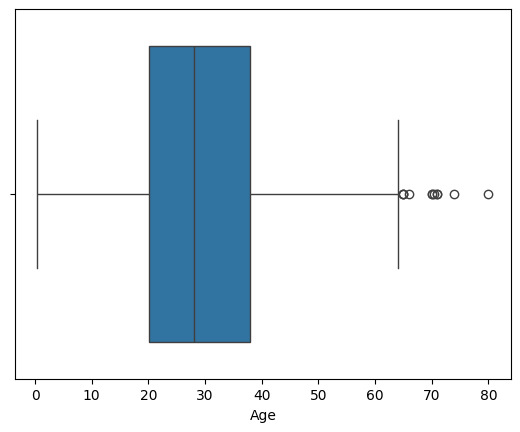

In [19]:
sns.boxplot(data=df, x="Age")
plt.show()

In [21]:
# Remplir les ages manquantes par le mediam :

In [22]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [23]:
# Remplir la valeur "Embarked" non defini par une valeur par default :

In [24]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [25]:
# Enlever la colonne "Cabin" parceque trop de valeurs manquent :

In [26]:
df = df.drop(columns=["Cabin"])

In [27]:
# Definir une fonction pour enlever les "outliers" :

In [29]:
def remove_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return data[(data[column] >= low) & (data[column] <= high)]

In [ ]:
# Enelver les outliers :

In [30]:
df = remove_outliers_iqr(df, "Age")
df = remove_outliers_iqr(df, "Fare")

In [31]:
# Asigner des types correct au colonnes du dataset :

In [32]:
df["Survived"] = df["Survived"].astype(int)
df["Pclass"] = df["Pclass"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")

In [34]:
# Encodage des variables catégorielles (One-Hot) :

In [33]:
df = pd.get_dummies(df, columns=["Sex", "Embarked", "Pclass"], drop_first=True)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True,False,True
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True,False,True
5,6,0,"Moran, Mr. James",28.0,0,0,330877,8.4583,True,True,False,False,True


In [35]:
# Exporter le dataset nettoye :

In [36]:
df.to_csv("data_clean.csv", index=False)